***
# <font color=green size=10>ESTADÍSTICAS CON PYTHON</font>
***

### ¿Por qué estudiar Estadística?

La **estadística** puede ser muy importante para una efectiva toma 
de decisiones. Existe una gran cantidad de valiosa información 
escondida entre los datos, pero esta información no suele ser fácilmente accesible, la estadística nos brinda los principios fundamentales que nos permiten extraer y entender esa información; tambien nos proporciona las herramientas necesarias para verificar la calidad de nuestros datos y nuestra información.

Existen 2 tipos de Estadística:
1. Estadística Descriptiva
2. Estadística Inferencial

## Conociendo la base de datos

In [3]:
import pandas as pd

In [4]:
datos = pd.read_csv('./data/base.csv')

In [5]:
datos.head()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# <font color=green>1. ESTADÍSTICA DESCRIPTIVA</font>
***

Se dedica a recolectar, ordenar, analizar y representar a un conjunto de datos, con el fin de describir apropiadamente sus características. Calcula los parámetros estadísticos que describen el conjunto estudiado. Algunas de las herramientas que utiliza son gráficos, distribuciones de frecuencias, medidas de centralización, medidas de posición, medidas de dispersión, entre otras.

## <font color=green>1.1 Distribuciones de Frecuencia</font>
***

### Distribuciones de frecuencia para una variable cualitativa

In [6]:
frecuencia = datos['Sexo'].value_counts()
frecuencia

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [7]:
porcentual = datos['Sexo'].value_counts(normalize=True) * 100
porcentual

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [8]:
dis_frec_cualitativas = pd.DataFrame({
    'Frecuencia':frecuencia,
    'Porcentual': porcentual
})

dis_frec_cualitativas

,Frecuencia,Porcentual
Sexo,,
0,53250,69.299844
1,23590,30.700156


### Distribuciones de frecuencia para más de una variable cualitativa

In [9]:
sexo = {0: 'Masculino', 
        1: 'Femenino'}

color = {0: 'Indígena', 
         2: 'Blanca', 
         4: 'Negra', 
         6: 'Amarilla', 
         8: 'Marrón', 
         9: 'NA'}

In [10]:
frecuencia = pd.crosstab(datos.Sexo,datos.Color)
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [11]:
porcentual = pd.crosstab(datos.Sexo,datos.Color, normalize=True) * 100
porcentual

Color,0,2,4,6,8
Sexo,,,,,
0,0.333160,28.883394,7.160333,0.305830,32.617126
1,0.131442,12.520822,3.759761,0.152264,14.135867


In [12]:
frecuencia = pd.crosstab(datos.Sexo,datos.Color)
frecuencia.rename(index=sexo, inplace=True)
frecuencia.rename(columns=color, inplace=True)
frecuencia

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [13]:
porcentual = pd.crosstab(datos.Sexo,datos.Color, normalize=True) * 100
porcentual.rename(index=sexo, inplace=True)
porcentual.rename(columns=color, inplace=True)
porcentual

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


In [14]:
porcentual = pd.crosstab(datos.Sexo,datos.Color, aggfunc='mean', values=datos.Renta)
porcentual.rename(index=sexo, inplace=True)
porcentual.rename(columns=color, inplace=True)
porcentual

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [15]:
porcentual = pd.crosstab(datos.Color,datos.Sexo, aggfunc='mean', values=datos.Renta)
porcentual.rename(index=color, inplace=True)
porcentual.rename(columns=sexo, inplace=True)
porcentual

Sexo,Masculino,Femenino
Color,,
Indígena,1081.710938,2464.386139
Blanca,2925.744435,2109.866750
Negra,1603.861687,1134.596400
Amarilla,4758.251064,3027.341880
Marrón,1659.577425,1176.758516


### Distribuciones de frecuencia para variables cuantitativas

#### Paso 1 - Definiendo el número de clases con la **Regla de Sturges**

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [16]:
import numpy as np
n = datos.shape[0]
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

#### Paso 2 - Crear frecuencias

In [17]:
frecuencia = pd.value_counts(
    pd.cut(
        x = datos.Renta,
        bins = k,
        include_lowest= True
    ), 
    sort=False
)

frecuencia

C:\Users\galla\AppData\Local\Temp\ipykernel_8940\2251150202.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia = pd.value_counts(


Renta
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [18]:
frecuencia = datos.Renta.value_counts(
    bins=k,
    sort=False
)
frecuencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [19]:
porcentual = datos.Renta.value_counts(
    bins=k,
    sort=False,
    normalize=True
) *100
porcentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: proportion, dtype: float64

In [20]:
dis_frec_cuantitavivas = pd.DataFrame({'frecuencia':frecuencia,'porcentual (%)':porcentual})
dis_frec_cuantitavivas

,frecuencia,porcentual (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## <font color=green>1.2 Histogramas</font>
***
El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencias. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

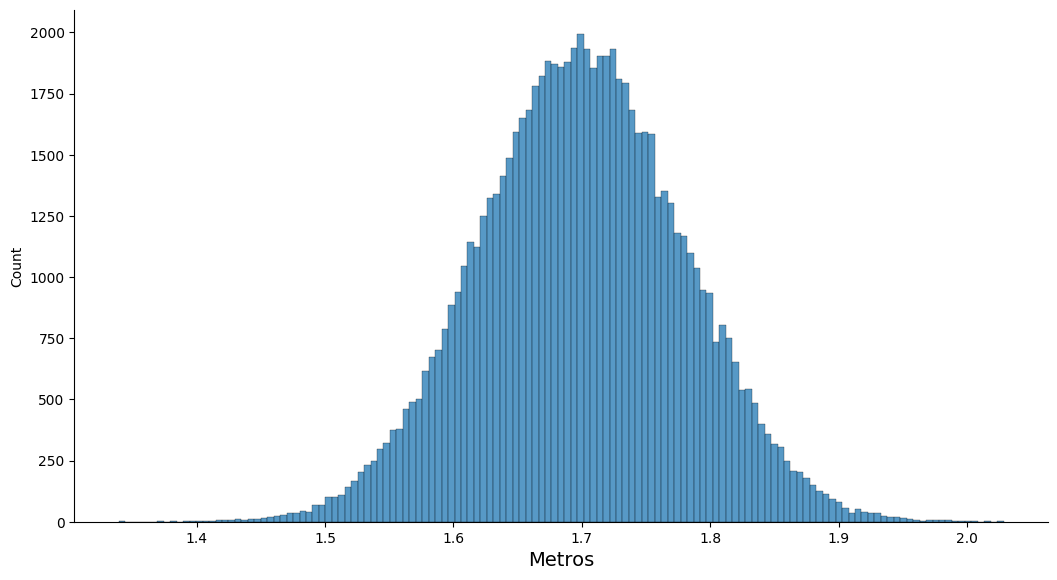

In [21]:
import seaborn as sns
ax = sns.displot(datos.Altura, kde=False)
ax.figure.set_size_inches(12,6)
ax.set_titles('Distribución de frecuencias - Altura', fontsize=18)
ax.set_xlabels('Metros', fontsize=14)

<Axes: >

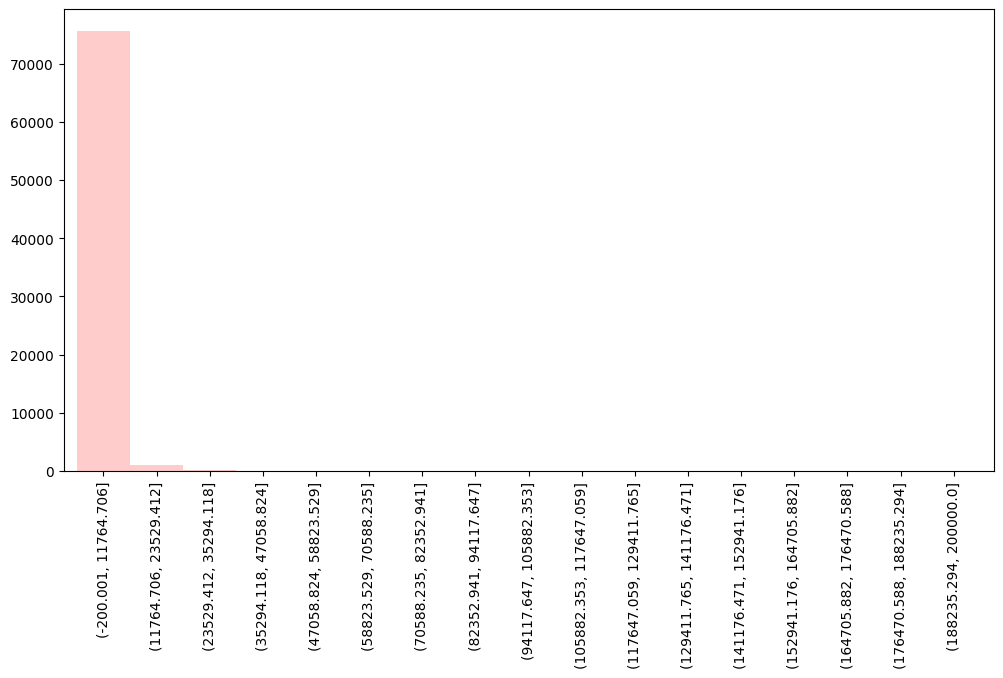

In [22]:
dis_frec_cuantitavivas['frecuencia'].plot.bar(width=1, color='red', alpha=0.2, figsize=(12,6))

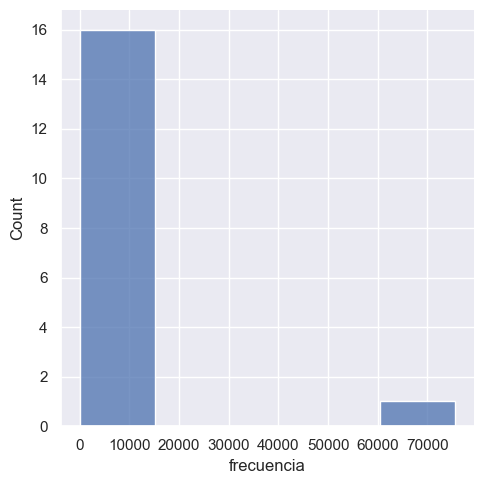

In [42]:
sns.displot(data=dis_frec_cuantitavivas, x="frecuencia",  bins=5);

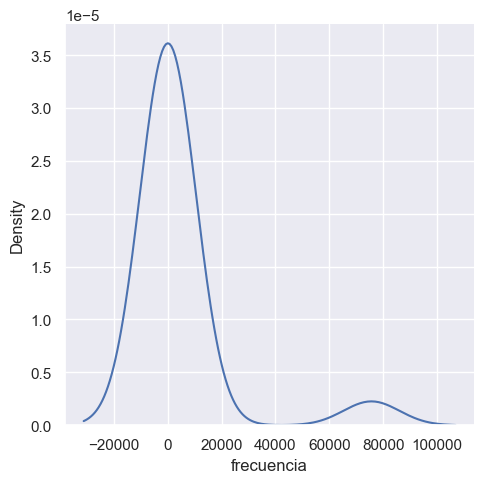

In [45]:
# sns.set_theme()
# sns.displot(data=dis_frec_cuantitavivas, x="frecuencia", col="frecuencia", kde=True)

# sns.displot(dis_frec_cuantitavivas.frecuencia, bins=10)

sns.displot(data=dis_frec_cuantitavivas, x="frecuencia",  kind='kde');


## <font color=green>1.3 Media aritmética</font>
***

Se representa por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [46]:
test = datos.head(5)
test

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [48]:
test.Edad.mean() 

34.8

In [49]:
test.Renta.mean() 

1296.0

In [51]:
datos.groupby(['Sexo']).Renta.mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renta, dtype: float64

## <font color=green>1.4 Mediana</font>
***

Para encontrar la mediana de un conjunto de datos, realizaremos lo siguiente:
1. Ordenamos el conjunto de datos;
2. Identificamos el número de observaciones (registros) en el conjunto de datos ($n$);
3. Identificamos el elemento mediano.

> Cuando $n$ es impar:
# $$Elemento_{Md} = \frac{n+1}2$$

> Cuando $n$ es par:
# $$Elemento_{Md} = \frac{n}2$$
4. Obtenemos la mediana:

> Cuando $n$ es impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ es par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_1_4.png' width='40%' style="float:left">

In [61]:
test = datos.tail(5)
test

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


In [63]:
test=test.Años_Estudio.sort_values()
test = test.reset_index().Años_Estudio
test

0     4
1     4
2     7
3    11
4    12
Name: Años_Estudio, dtype: int64

In [68]:
n = test.shape[0]
elemento_m = (n+1)/2
test.loc[elemento_m - 1]

7

In [69]:
test.median()

7.0

### Ejemplo 2 - n par

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_1_4_2.png' width='50%' style="float:left">

### Obteniendo la mediana en nuestro dataset

## <font color=green>1.5 Moda</font>
***

La moda se puede definir como el valor más frecuente en un conjunto de datos. La moda se usa a menudo para datos cualitativos.

### Obteniendo la moda en nuestro dataset

## <font color=green>1.6 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en diseño a la mediana, aunque no son medidas de tendencia central. Como es sabido, la mediana divide la distribución en dos partes iguales en función del número de elementos de cada parte. Los cuartiles, por su parte, permiten dividir la distribución en cuatro partes iguales en función del número de elementos en cada una; deciles en diez partes y percentiles en cien partes iguales.

## <font color=green>1.7 Box-plot</font>
***

El Box-plot da una idea de posición, dispersión, asimetría, colas y valores atípicos (outliers). La posición central viene dada por la mediana y la dispersión por $IIQ$. Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de cola están dadas por las líneas que van desde el rectángulo hasta los valores remotos y los valores atípicos.

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_1_7.png' width='65%'>

## <font color=green>1.8 Desviación Media Absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=green>1.9 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media se elevan al cuadrado.

### Varianza muestral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=green>1.10 Desviación estandar</font>
***

Una de las limitaciones de la varianza es que proporciona medidas en cuadrados de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estandar muestral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

# <font color=green>2. ESTADÍSTICA INFERENCIAL</font>
***

Se dedica a estudiar cómo sacar conclusiones generales para toda la población a partir del estudio de una muestra, y el grado de fiabilidad o significación de los resultados obtenidos. Sus principales herramientas son el muestreo, la estimación de parámetros y el contraste de hipótesis.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de ocurrencia de solo dos categorías. Estas categorías juntas representan todo el espacio muestral, y además son mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas de situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tengan éxito

### Combinaciones

Es importante resaltar que la expresión entre paréntesis no es una expresión matricial, sino que es el resultado de una combinación sin repetición. Este se obtiene con la siguiente fórmula:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición:

## $$0! = 1$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

## <font color='blue'>Ejemplo: Mega Sorteo</font>

En un billete de lotería Mega Sorteo tenemos un total de **60 números** a elegir donde la apuesta mínima es de **seis números**. Tú que tienes curiosidad decides calcular la probabilidad de ganar el Mega Sorteo con solo **un juego**. Para ello necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

## <font color='blue'>Ejemplo: Concurso para Data Scientist</font>

En un concurso para cubrir una vacante de científico de datos tenemos un total de **10 preguntas de opción múltiple** con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Supongamos que un candidato decide aventurarse sin haber estudiado nada en absoluto. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y el puntaje de corte es 5**, obtenga la probabilidad de que este candidato **responda correctamente 5 preguntas** y también la probabilidad de que este candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cual es la cantidad de preguntas o ensayos ($n$)?

### ¿Cuál es la probabilidad de éxito ($p$)?

### ¿Cuál es la probabilidad de fracaso ($q$)?

### ¿Cuál es el número de eventos que se desea tener éxito ($k$)?

### Solución 1

### Solución 2

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

### Obtener la probabilidad de que el candidato pase la prueba

### $$P(Aprobado \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

## <font color='blue'>Ejemplo: Yincana</font>

En un pueblo se organiza una yincana todos los años para recaudar fondos para el hospital de la ciudad. Se sabe que la **proporción de mujeres participantes en la yincana es del 60%**. **El número total de equipos, con 12 integrantes, inscritos para la yincana de este año es de 30**. Con la información anterior responde: ¿Cuántos equipos deben estar formados por **8 mujeres**?

### Solución

### Media de la distribución binomial

El valor esperado o la media de una distribución binomial es igual al número de experimentos realizados multiplicado por la posibilidad de que ocurra el evento.

# $$\mu = n \times p$$

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero la imposibilidad de contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación de la cantidad de clientes que ingresan a una tienda a una hora determinada, la cantidad de autos que llegan a un drive-thru de una cafetería a la hora del almuerzo, la determinación de el número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio determinado

$k$ = número de éxitos en el rango deseado

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe una media de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado elegido al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el promedio de visitas por hora ($\mu$)?

### ¿Cuántas ocurrencias queremos obtener en el período ($k$)?

### Solución 1

### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica con respecto a su media.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media o promedio

La probabilidad se obtiene a partir del área bajo la curva, delimitada por los límites inferior y superior especificados. Un ejemplo se puede ver en la siguiente figura.

![alt text](https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3.png)

Para obtener el área anterior, basta calcular la integral de la función para los intervalos dados. De acuerdo con la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media o promedio

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas (Tabla Z)

Las tablas estandarizadas se crearon para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para consultar los valores en una tabla estandarizada, solo necesitamos transformar nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa el alejamiento en desviaciones estándares de un valor de la variable original en relación a la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media o promedio

### Construyendo una tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_estandarizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_estandarizada.index:
    for column in tabla_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)
tabla_estandarizada

ModuleNotFoundError: No module named 'scipy'

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_2.png' width='250px'>

La tabla anterior muestra el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que por tratarse de valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cual es tu altura?</font>

En un estudio sobre las alturas de los habitantes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona seleccionada al azar mida menos de 1.80 metros.

> **B.** probabilidad de que una persona seleccionada al azar mida entre 1.60 y 1.80 metros.

> **C.** probabilidad de que una persona seleccionada al azar mida más de 1.90 metros.

### Problema A - Identificar el área bajo la curva

<img style='float: left' src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_1.png' width='350px'>

### Obtener la variable estandarizada $Z$

### Solución 1: Usando Tabla Z

### Solución 2 - Usando Scipy

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_3.png' width='350px'>

### Obtener la variable estandarizada $Z$

### Solución 1: Usando Tabla Z

### Solución 2 - Usando Scipy

### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_4.png' width='350px'>

### Obtener la variable estandarizada $Z$

### Solución 1: Usando Tabla Z

### Solución 2 - Usando Scipy

# <font color=green>3. TECNICAS DE MUESTREO</font>
***

## <font color=green>3.1 Población y muestra</font>
***

### Población
Conjunto de todos los elementos de interés en un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El objetivo principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre los parámetros de la población utilizando información muestral.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad de choque en automóviles.

### Resultados rápidos

Encuestas que necesitan más agilidad en la divulgación. Ejemplo: encuestas de opinión, encuestas sobre temas de salud pública.

### Precios Elevados

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo aleatorio simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

## <font color=green>3.4 Muestreo estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. Este método propone la división de la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, se aplica la técnica de muestreo aleatorio simple dentro de cada subgrupo individualmente.

## <font color=green>3.5 Muestreo por conglomerados</font>
***

También pretende mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados, los subgrupos serán heterogéneos, por lo que se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnicas es en la división de la población en grupos territoriales, donde los elementos investigados tendrán características muy variadas.

# <font color=green>4. INTERVALO DE CONFIANZA</font>
***

Es una forma de hacer suposiciones generalizadas sobre los parámetros de una población con base en la información de una muestra.

- **Parámetros** son atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimativa** es el valor obtenido para un determinado parámetro a partir de datos de una muestra de la población.

## <font color=green>4.1 Teorema del límite central</font>
***

> El **Teorema del límite central** establece que, a medida que aumenta el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para $n$ mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Comprendiendo el teorema del límite central

> El teorema del límite central establece que **a medida que aumenta el tamaño de la muestra, la distribución de las medias de la muestra se aproxima a una distribución normal** con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal **con una media igual a la media poblacional** y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media poblacional y **desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra**. Este hecho es válido para n mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.2 Niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significación** ($\alpha$) expresa la probabilidad de error de estimación.

El **nivel de confianza** representa el grado de confianza de que el resultado de la estimación se encuentra dentro de un rango determinado. Cuando establecemos un **nivel de confianza** del 95% en una encuesta, por ejemplo, estamos asumiendo que existe un 95% de probabilidad de que los resultados de la encuesta representen bien la realidad, es decir, que sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal, como se ilustra en la siguiente figura.

![alt text](https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_4_2_1.png)

## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar de población conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de los sacos de arroz en una industria alimentaria se distribuyen aproximadamente como una normal de **desviación estándar poblacional igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para la **media poblacional** suponiendo un **nivel de significancia del 5 %**.

### Media muestral

### Nivel de significación ($\alpha$)

### Nivel de confianza ($1 - \alpha$)

### Obteniendo $z$

### Obteniendo $z$

![alt text](https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_4_2_2.png)

### Valores de $z$ para los niveles de confianza más utilizados
|Nivel de<br> confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

### Obteniendo $e$

### Solución 1 - Cálculo del intervalo de confianza para la media

### Solución 2 - Cálculo del intervalo de confianza para la media

# <font color=green>5. TAMAÑO DE UNA MUESTRA</font>
***

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Rendimiento promedio</font>

Estamos estudiando el ingreso mensual de los jefes de hogar. Nuestro supervisor ha determinado que el **error máximo con relación a la media es $\$$100,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$3323.39**. Para un **nivel de confianza del 95 %**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

### Obteniendo $\sigma$

### Obteniendo $e$

### Obteniendo $n$

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: industria de refrescos</font>

En un lote de **10000 latas** de refresco, se realizó un muestreo aleatorio simple de **100 latas** y se obtuvo la **desviación estándar muestral del contenido de las latas igual a 12 ml**. El fabricante estipula un **error máximo sobre la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95 %**, ¿qué tamaño de muestra debe seleccionarse para este estudio?

### Obteniendo $N$

### Obteniendo $z$

### Obteniendo $s$

### Obteniendo $e$

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

# <font color=green>6. EJERCICIOS FINALES</font>
***

Estamos estudiando la **renta mensual de los jefes de hogar con renta hasta $\$$5000.00**. Nuestro supervisor ha determinado que el **error máximo con relación a la media es $\$$10**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$1082.79** y que la **media poblacional** es **$\$$1426.54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? Y ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el dataset según lo especificado por el problema

### Cálculo del tamaño de la muestra

### Cálculo del intervalo de confianza para la media

### Realizando una prueba gráfica

In [ ]:
import matplotlib.pyplot as plt

tamaño_simulacion = 1000

medias = [renta_5000.sample(n = n).mean() for i in range(1, tamaño_simulacion)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamaño_simulacion, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamaño_simulacion, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamaño_simulacion, colors='red', linestyles='dashed')
ax

# <font color='green'>Problema A</font>

Evaluando nuestro dataset, es posible verificar que la **proporción de hombres** como jefes del hogar es de casi el **70%**. Necesitamos **seleccionar aleatoriamente grupos de 10 personas** para buscar diferencias en los ingresos de cada grupo. ¿Cuál es la **probabilidad de seleccionar un grupo que presente la misma proporción de la población**, es decir, seleccionar un grupo que esté **compuesto por 7 hombres y 3 mujeres**?

#### <font color='blue'>Como tarea adicional, verifique la proporción real de hombres y mujeres en nuestro dataset.</font>

#### <font color='red'>Compruebe qué tipo de distribución de probabilidad se ajusta a este diseño.</font>

### Solución

# <font color='green'>Problema B</font>

Continuando con la pregunta anterior, **cuántos grupos de 10 personas** tendríamos que seleccionar al azar para obtener **100 grupos compuestos por 7 hombres y 3 mujeres**?

#### <font color='red'>Recuerde cómo calcular la media de una distribución binomial</font>

### Solución

### Media de la distribución binomial

# $$\mu=nXp$$

# <font color='green'>Problema C</font>

Un cliente nos encargó realizar un estudio para evaluar los **ingresos de los jefes de hogar**. Para ello, necesitamos realizar una nueva colecta de datos, es decir, una nueva investigación de campo. Después de la reunión con el cliente, fue posible enumerar el siguiente conjunto de informaciones:

> A. El resultado de la encuesta debe estar listo en **2 meses**;

> B. Solo tendremos **$\$$150000.00** en recursos para realizar la investigación de campo; y
    
> C. Sería interesante un **margen de error no superior al 10% con respecto a la media estimada**.

En nuestra experiencia con estudios de este tipo, sabemos que el **costo promedio por entrevistado ronda los $\$$100.00**. Con este conjunto de hechos, evalúe y obtenga el siguiente conjunto de informaciones para transmitir al cliente:


> 1. Para obtener una estimación de los parámetros de la población (ingresos de los jefes del hogar), realice un muestreo aleatorio simple en nuestro conjunto de datos. Esta muestra debe contener 200 elementos (use random_state = 101 para asegurarse de que el mismo experimento se puede realizar nuevamente). Obtenga la media y la desviación estándar de esta muestra.
    
> 2. Para el **margen de error** especificado por el cliente, obtener los **tamaños de muestra** necesarios para garantizar los **90%, 95% y 99% de confianza**.
    
> 3. Obtenga el **costo de la investigación** para los tres niveles de confianza.
    
> 4. Para el nivel de confianza más alto (dentro del presupuesto disponible), obtenga un **intervalo de confianza para la media de la población**.
    
> 5. Asumiendo el **nivel de confianza elegido en el ítem anterior**, ¿qué **margen de error** se puede considerar utilizando todos los recursos puestos a disposición por el cliente?
    
> 6. Suponiendo un **nivel de confianza del 95%**, **cuánto le costaría al cliente la encuesta** si se considerara un **margen de error de solo el 5%** en relación con la media estimada?

# <font color='blue'>Solución para el punto 1</font>

### Selección de una muestra aleatoria simple

#### <font color='red'>Recuerde usar *random_state = 101*</font>

### Datos del problema

# <font color='blue'>Solución para el punto 2</font>

### Obtener el margen de error

#### <font color='red'>Recuerde que el margen de error debe estar en la misma unidad que la variable en estudio ($)</font>

In [ ]:

print('El margen de error es aproximadamente de $%0.2f' % (e))

### Tamaño de la muestra ($1 - \alpha = 90\%$)

In [ ]:

print('Para un nivel de confianza del 90%% debemos seleccionar una muestra de %s elementos.' % n_confianza_90)

### Tamaño de la muestra ($1 - \alpha = 95\%$)

In [ ]:

print('Para un nivel de confianza del 95%% debemos seleccionar una muestra de %s elementos.' % n_confianza_95)

### Tamaño de la muestra ($1 - \alpha = 99\%$)

In [ ]:

print('Para un nivel de confianza del 99%% debemos seleccionar una muestra de %s elementos.' % n_confianza_99)

# <font color='blue'>Solución para el punto 3</font>

### Coste de la encuesta para un nivel de confianza del 90%

In [ ]:

print('Para un nivel de confianza del 90%, el costo de la encuesta sería $ {:,.2f}.'.format(costo_confianza_90))

### Coste de la encuesta para un nivel de confianza del 95%

In [ ]:

print('Para un nivel de confianza del 95%, el costo de la encuesta sería $ {:,.2f}.'.format(costo_confianza_95))

### Coste de la encuesta para un nivel de confianza del 99%

In [ ]:

print('Para un nivel de confianza del 99%, el costo de la encuesta sería $ {:,.2f}.'.format(costo_confianza_99))

# <font color='blue'>Solución para el punto 4</font>

# <font color='blue'>Solución para el punto 5</font>

In [ ]:

print('El nuevo margen de error es {:.2f}%.'.format(e_porcentual * 100))

# <font color='blue'>Solución para el punto 6</font>

In [ ]:

print('El margen de error es aproximadamente de $%0.2f' % (e))

In [ ]:

print('Para un nivel de confianza del 95%% debemos seleccionar una muestra de %s elementos.' % n_confianza_95)

In [ ]:

print('Para un nivel de confianza del 95%, el costo de la encuesta sería de ${:,.2f}.'.format(costo_confianza_95))